<a href="https://colab.research.google.com/github/alzimna/ara/blob/main/Code/ara_team_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas plotly xlsxwriter

In [2]:
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
from collections import defaultdict
warnings.filterwarnings("ignore", category=UserWarning)

# **Data dari USK**

## River

In [89]:
url = "https://github.com/alzimna/ara/raw/refs/heads/main/River%20of%20Pontianak%20City%20(Polygon)/River_Pontianak.shx"
river = gpd.read_file(url)
river.head()

,OBJECTID,METADATA,SRS_ID,WADMKC,WADMKK,WADMPR,UUPP,BUFF_DIST,ORIG_FID,geometry
0,5036,TASWIL1000020201023_DATA_BATAS_DESA/KELURAHAN,SRGI 2013,Pontianak Barat,Kota Pontianak,Kalimantan Barat,Hasil Delineasi Batas Desa 2018,100.0,0,"POLYGON ((109.29154 0.00825, 109.29361 0.00807..."


<Axes: >

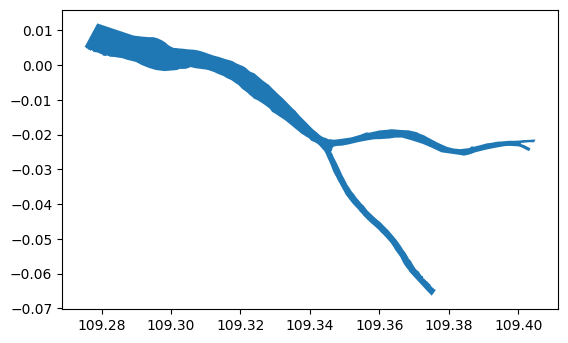

In [90]:
river.plot()

## Government Building Distribution

In [5]:
import fiona



url = "https://github.com/alzimna/ara/raw/refs/heads/main/Goverment%20Building%20Distribution/Goverment_Bulding_Distribution.shx"
gov = gpd.read_file(url)
gov.head()

,Name,Keterangan,Ket,geometry
0,BPDAS Kapuas,BMDK,District-Owned Properties / BMDK,POINT Z (109.35518 -0.06307 0)
1,Pengadilan Tinggi Agama Pontianak,BMN,Stated-Owned Properties / BMDP,POINT Z (109.35536 -0.06323 0)
2,BKKBN Kalimantan Barat,BMDP,Provincial-Owned Properties / BMDP,POINT Z (109.36501 -0.06062 0)
3,UPT BP2MI Kalimantan Barat,BMN,Stated-Owned Properties / BMDP,POINT Z (109.31874 -0.03618 0)
4,Kementrian Keuangan Republik Indonesia Direkto...,BMN,Stated-Owned Properties / BMDP,POINT Z (109.33999 -0.04888 0)


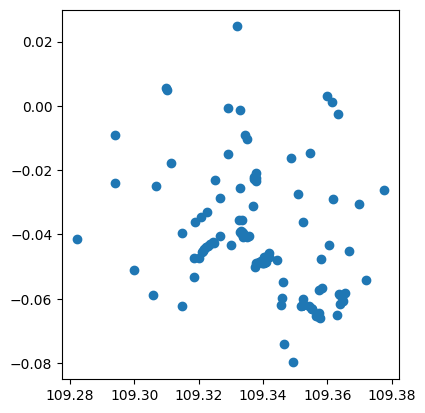

In [6]:
gov.plot()
plt.show()

## Land Cover

In [7]:
# Membuka layer bangunan dari file .osm
url = "https://github.com/alzimna/ara/raw/refs/heads/main/Land_Cover/Land_Cover_Pontianak.shx"
landcov = gpd.read_file(url)
landcov.head()

,OBJECTID,FID_LandCo,pl17_id,desc_in,n,FID_Tanah_,FAOSOIL,DOMSOI,Jns_Tnh,Tanah_Umum,CN,S,Ia,Shape_Leng,Shape_Area,geometry
0,1,0,2010,Perkebunan,0.45,45,Jd9-2/3a,Jd,Entisol,Lempung Berliat,78.0,72,14,4091.079809,5.398489e+05,"MULTIPOLYGON (((321753.599 10003431.897, 32177..."
1,2,1,20051,Hutan Rawa Sekunder,0.12,45,Jd9-2/3a,Jd,Entisol,Lempung Berliat,77.0,76,15,1221.272328,2.643175e+04,"POLYGON ((316009.57 10004970.774, 316028.367 1..."
2,3,2,20071,Belukar Rawa,0.08,85,Od19-a,Od,Vertisol,Liat Berdebu,89.0,31,6,72867.947312,2.400039e+07,"MULTIPOLYGON (((310641.166 9985210.783, 310623..."
3,4,3,20091,Pertanian Lahan Kering,0.05,45,Jd9-2/3a,Jd,Entisol,Lempung Berliat,88.0,35,7,342208.420490,1.006952e+08,"MULTIPOLYGON (((306686.637 9985627.118, 306880..."
4,5,3,20091,Pertanian Lahan Kering,0.05,85,Od19-a,Od,Vertisol,Liat Berdebu,91.0,25,5,172256.843541,5.234579e+07,"MULTIPOLYGON (((311777.91 9984991.667, 311252...."


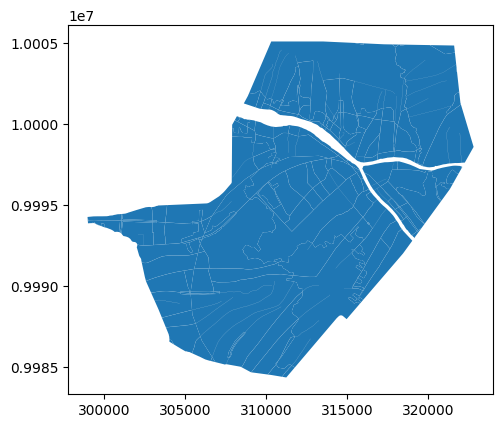

In [8]:
landcov.plot()
plt.show()

yang digenerate oleh USK bukan map sebenarnya, bisa dilihat dari multipolygonnya

# **Data dari Geofabrik**

In [9]:
!pip install osmium

In [10]:
import osmium
import shapely.wkb
import pandas as pd
import geopandas as gpd
import requests

def merge_two_dicts(x, y):
    z = x.copy()   # start with keys and values of x
    z.update(y)    # modifies z with keys and values of y
    return z

class AdminAreaHandler(osmium.SimpleHandler):
    def __init__(self):
        osmium.SimpleHandler.__init__(self)

        self.areas = []
        self.wkbfab = osmium.geom.WKBFactory()

    def area(self, a):
        if  "admin_level" in a.tags:

            wkbshape = self.wkbfab.create_multipolygon(a)
            shapely_obj = shapely.wkb.loads(wkbshape, hex=True)

            area = { "id": a.id, "geo": shapely_obj }
            area = merge_two_dicts(area, a.tags)

            self.areas.append(area)

handler = AdminAreaHandler()

# path to file to local drive
# download from https://download.geofabrik.de/index.html


url = "https://github.com/alzimna/ara/raw/refs/heads/main/kalimantan-260118.osm.pbf"
local_file = "kalimantan-260118.osm.pbf"

r = requests.get(url, stream=True)
with open(local_file, "wb") as f:
    for chunk in r.iter_content(chunk_size=8192):
        f.write(chunk)

handler.apply_file(local_file, locations=True, idx='flex_mem')


df = pd.DataFrame(handler.areas)
kalimantan = gpd.GeoDataFrame(df, geometry="geo")
kalimantan

,id,geo,addr:city,addr:full,addr:housenumber,addr:postcode,addr:street,admin_level,building,building:levels,...,border_type:id,old_name,start_date,wikipedia:en,name:jv,name:mn,name:br,short_name:uk,sport,school:type_idn
0,454162402,"MULTIPOLYGON (((116.98968 -0.41323, 116.98968 ...",Kabupaten Kutai Kartanegara,"JL. Sutoyo, Panji, Kalimantan Timur",26,75513,Jalan Pangeran Diponegoro,5,yes,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,470823010,"MULTIPOLYGON (((116.83447 -1.26818, 116.83466 ...",NaN,Jl. Telaga Sari,NaN,NaN,NaN,5,yes,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,472266414,"MULTIPOLYGON (((114.78481 -3.8027, 114.78487 -...",NaN,Jl. A. Syairani,NaN,NaN,NaN,5,yes,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,472918222,"MULTIPOLYGON (((114.76935 -3.76899, 114.77045 ...",NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,488078414,"MULTIPOLYGON (((115.81819 3.10217, 115.81825 3...",NaN,NaN,NaN,NaN,NaN,7,village_office,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,2816991706,"MULTIPOLYGON (((116.26868 -1.44862, 116.26868 ...",NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2320,29842181,"MULTIPOLYGON (((116.17486 1.89729, 116.17552 1...",NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2321,19768921,"MULTIPOLYGON (((117.51449 3.38413, 117.51451 3...",NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2322,32471789,"MULTIPOLYGON (((116.83665 -1.27558, 116.83668 ...",NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Map kota Pontianak**

## versi USK

In [11]:
url = "https://github.com/alzimna/ara/raw/refs/heads/main/District%20Administrative%20Boundary/District_Administrative_Boundary.shx"

pontianak = gpd.read_file(url)
pontianak

,Kabupaten,geometry
0,Kota Pontianak,"POLYGON ((318580.157 10001017.17, 318599.284 1..."


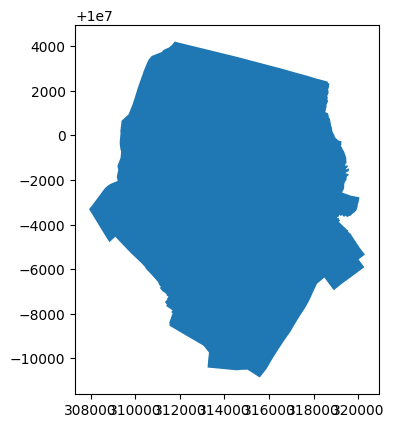

In [12]:
import matplotlib.pyplot as plt
pontianak.plot()
plt.show()

## versi Geofabrik

<Axes: >

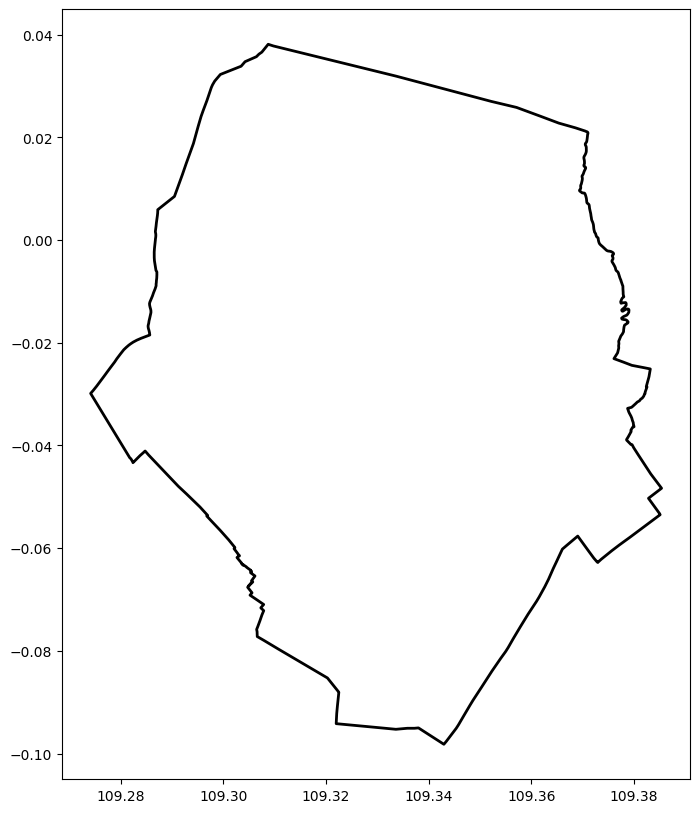

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

ponti = kalimantan[(kalimantan["official_name"]=="Kota Pontianak")]
ponti.set_crs("EPSG:23850").plot(ax=ax, alpha=1, edgecolor="#000", linewidth=2, facecolor='none')


# **Map berdasarkan kecamatan**

## versi USK

In [14]:
# Membuka layer bangunan dari file .osm
url = "https://github.com/alzimna/ara/raw/refs/heads/main/Sub-District%20Administrative%20Boundary/Subdistrict_Administration_Boundary.shx"

kecamatan = gpd.read_file(url)
kecamatan

,kecamatan,Kabupaten,geometry
0,Pontianak Barat,Kota Pontianak,"POLYGON ((309531.765 10000595.14, 309533.122 1..."
1,Pontianak Kota,Kota Pontianak,"POLYGON ((315020.861 9998074.922, 315063.218 9..."
2,Pontianak Selatan,Kota Pontianak,"POLYGON ((315923.934 9997058.075, 315953.752 9..."
3,Pontianak Tenggara,Kota Pontianak,"POLYGON ((317998.325 9994324.297, 318026.516 9..."
4,Pontianak Timur,Kota Pontianak,"POLYGON ((320027.546 9997037.659, 319973.045 9..."
5,Pontianak Utara,Kota Pontianak,"POLYGON ((318580.157 10001017.17, 318599.284 1..."


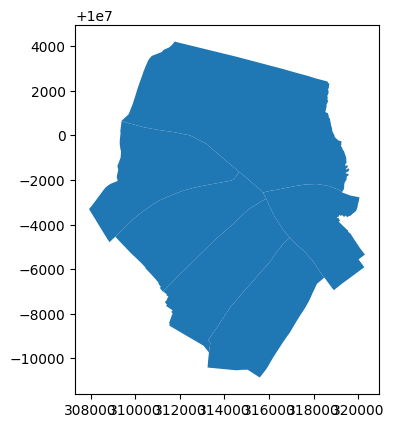

In [15]:
import matplotlib.pyplot as plt
kecamatan.plot()
plt.show()

## versi Geofabrik

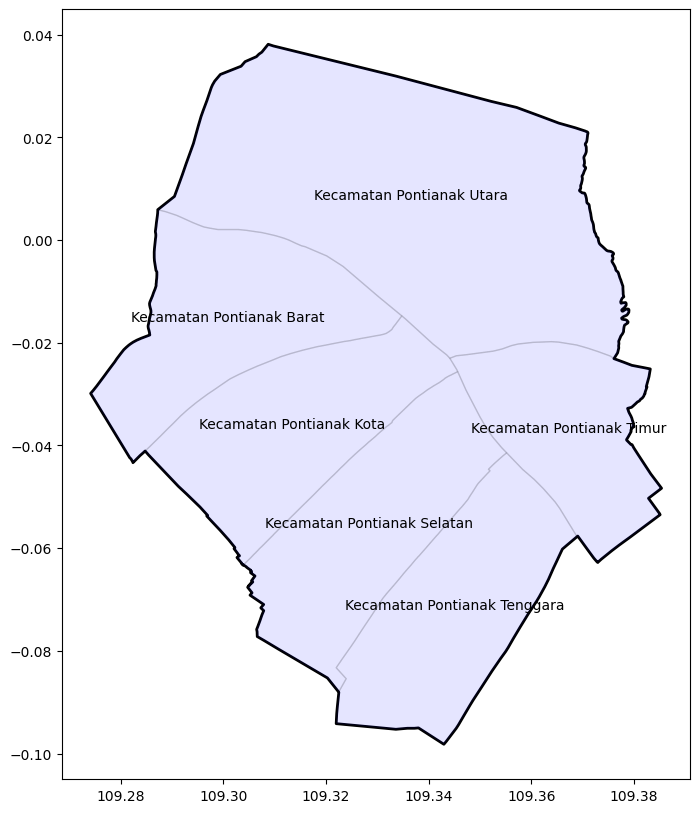

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

kalimantan[(kalimantan["official_name"]=="Kota Pontianak")].set_crs("EPSG:23850").plot(ax=ax, alpha=1, edgecolor="#000", linewidth=2, facecolor='none')

cek = []
for i in range(len(kalimantan)) :
  temp = kalimantan["official_name"].iloc[i]
  if "Kecamatan Pontianak" in str(temp) :
    cek.append(i)
kec = kalimantan.iloc[cek].set_crs("EPSG:23850")
kec.plot(ax=ax, alpha=.1, facecolor='b', edgecolor="#000", linewidth=1)

# add labels
for idx, row in kec.iterrows():
    ax.annotate(text=row["official_name"], xy=(row.geo.centroid.x, row.geo.centroid.y), horizontalalignment='center')#, xy=row.geo.centroid)

# **Map berdasarkan desa**


## versi USK

In [17]:
# Membuka layer bangunan dari file .osm
url = "https://github.com/alzimna/ara/raw/refs/heads/main/Village%20Administrative%20Boundary/Village_Administrative_Boundary.shx"
desa_usk = gpd.read_file(url)
desa_usk

,nmdesa,kecamatan,Kabupaten,geometry
0,Banjar Serasan,Pontianak Timur,Kota Pontianak,"POLYGON ((317035.075 9995851.982, 317063.921 9..."
1,Dalam Bugis,Pontianak Timur,Kota Pontianak,"POLYGON ((316297.478 9997336.861, 316317.258 9..."
2,Parit Mayor,Pontianak Timur,Kota Pontianak,"POLYGON ((320241.503 9994739.36, 320249.128 99..."
3,Saigon,Pontianak Timur,Kota Pontianak,"POLYGON ((319130.458 9996250.924, 319165.423 9..."
4,Tambelan Sampit,Pontianak Timur,Kota Pontianak,"POLYGON ((316179.331 9996893.203, 316218.042 9..."
5,Tanjung Hilir,Pontianak Timur,Kota Pontianak,"POLYGON ((317816.227 9997689.125, 317816.175 9..."
6,Tanjung Hulu,Pontianak Timur,Kota Pontianak,"POLYGON ((319270.818 9997488.753, 319294.027 9..."
7,Bangka Belitung Darat,Pontianak Tenggara,Kota Pontianak,"POLYGON ((315065.348 9989475.307, 315139.257 9..."
8,Bangka Belitung Laut,Pontianak Tenggara,Kota Pontianak,"POLYGON ((317635.475 9992323.917, 317582.496 9..."
9,Bansir Darat,Pontianak Tenggara,Kota Pontianak,"POLYGON ((315065.138 9989475.442, 315063.475 9..."


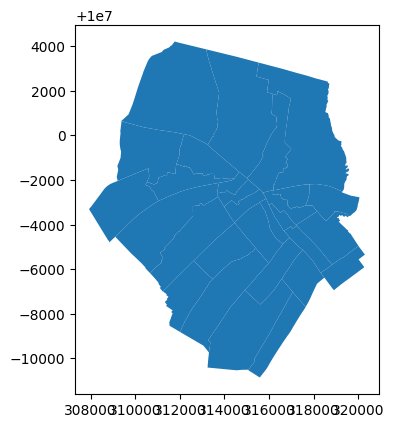

In [18]:
import matplotlib.pyplot as plt
desa_usk.plot()
plt.show()

## versi Geofabrik

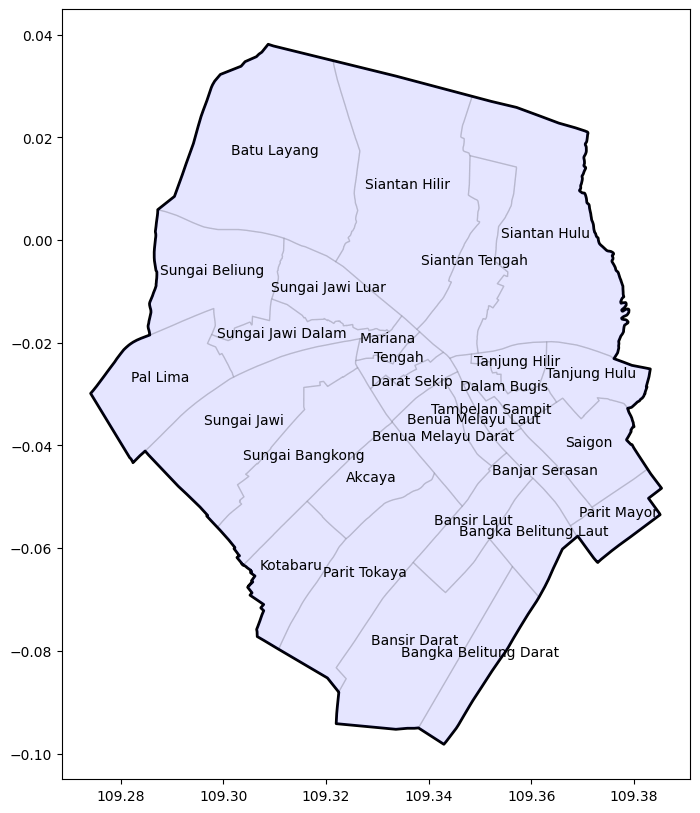

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

kalimantan[(kalimantan["official_name"]=="Kota Pontianak")].set_crs("EPSG:23850").plot(ax=ax, alpha=1, edgecolor="#000", linewidth=2, facecolor='none')

cek = []
for i in range(len(kalimantan)) :
  temp = kalimantan["wikipedia"].iloc[i]
  if "Pontianak" in str(temp) :
    cek.append(i)
  # if "Saigon" in str(temp) :
  #   cek.append(i)

desa = kalimantan.iloc[cek]
desa = desa[(desa["place"]=="village") | (desa["name"]=="Saigon")]
desa.set_crs("EPSG:23850").plot(ax=ax, alpha=.1, facecolor='b', edgecolor="#000", linewidth=1)

# add labels
for idx, row in desa.iterrows():
    ax.annotate(text=row["name"], xy=(row.geo.centroid.x, row.geo.centroid.y), horizontalalignment='center')#, xy=row.geo.centroid)

# **Building**

## versi USK

In [20]:
# Membuka layer bangunan dari file .osm
url = "https://github.com/alzimna/ara/raw/refs/heads/main/Building/Building_Footprint_Pontianak.shx"
building_usk = gpd.read_file(url)
building_usk.head()

,osm_id,osm_type,addr_stree,building,military,office,government,landuse,name,access_roo,building_m,isced_leve,addr_house,capacity,roof_mater,amenity,emergency,Kecamatan,geometry
0,574155598.0,ways_poly,None,yes,None,None,None,None,None,None,None,None,None,None,None,None,None,Pontianak Barat,"POLYGON Z ((109.28768 7.4e-5 0, 109.28778 5.54..."
1,574155627.0,ways_poly,None,yes,None,None,None,None,None,None,None,None,None,None,None,None,None,Pontianak Barat,"POLYGON Z ((109.28727 1.56615e-5 0, 109.28726 ..."
2,574155454.0,ways_poly,None,yes,None,None,None,None,None,None,None,None,None,None,None,None,None,Pontianak Barat,"POLYGON Z ((109.2868 0.00017 0, 109.28678 1.71..."
3,574155596.0,ways_poly,None,yes,None,None,None,None,None,None,None,None,None,None,None,None,None,Pontianak Barat,"POLYGON Z ((109.28779 0.00011 0, 109.28779 7.0..."
4,573354340.0,ways_poly,None,yes,None,None,None,None,None,None,None,None,None,None,None,None,None,Pontianak Timur,"POLYGON Z ((109.36338 -0.04253 0, 109.36329 -0..."


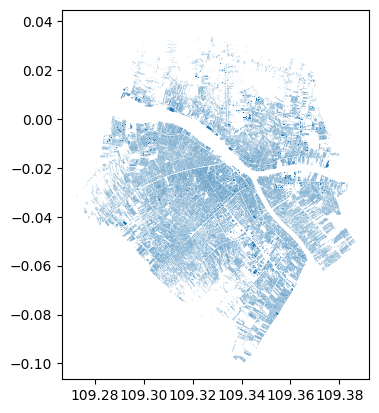

In [21]:
building_usk.plot()
plt.show()

## versi Geofabrik

In [22]:
# import fiona

# url = "https://github.com/alzimna/ara/raw/refs/heads/main/kalimantan-260119-free.shp/gis_osm_buildings_a_free_1.shx"
# fiona.listlayers(url)

In [23]:
# building = gpd.read_file(url)
# print(building.head())

In [24]:
# building.info()

In [25]:
# building["type"].unique()

### ambil yang beririsan dengan pontianak

In [26]:
# luar = ponti.iloc[0]["geo"]

# mask = building.geometry.intersects(luar)
# pontianak2 = building[mask].copy()
# pontianak2.to_file("building_from_geofabrik.shp")

kalau pakai within dapat data 150837, kalau pakai intersects dapat 150947

In [27]:
import pandas as pd
url = "https://github.com/alzimna/ara/raw/refs/heads/main/Building_Geofabrik/building_from_geofabrik.shp"
building_geofabrik = gpd.read_file(url)
building_geofabrik = building_geofabrik[building_geofabrik["geometry"].notna()]
building_geofabrik

,osm_id,code,fclass,name,type,geometry
0,123177072,1500,building,Ayani Mega Mall,commercial,"POLYGON ((109.34421 -0.05176, 109.34431 -0.051..."
1,155153671,1500,building,Gayatri,None,"POLYGON ((109.35566 -0.06503, 109.35574 -0.064..."
2,174086491,1500,building,None,None,"POLYGON ((109.32721 -0.01825, 109.32742 -0.018..."
3,174086493,1500,building,Rumah Duka St. Michael,None,"POLYGON ((109.32757 -0.01917, 109.32788 -0.019..."
4,174086496,1500,building,None,None,"POLYGON ((109.32765 -0.01977, 109.32765 -0.019..."
...,...,...,...,...,...,...
150942,1457486452,1500,building,None,None,"POLYGON ((109.34341 -0.06879, 109.34355 -0.068..."
150943,1457486453,1500,building,None,None,"POLYGON ((109.34406 -0.06933, 109.3441 -0.0693..."
150944,1457486454,1500,building,None,None,"POLYGON ((109.34393 -0.06941, 109.34405 -0.069..."
150945,1457491875,1500,building,None,None,"POLYGON ((109.3338 -0.0238, 109.33382 -0.02375..."


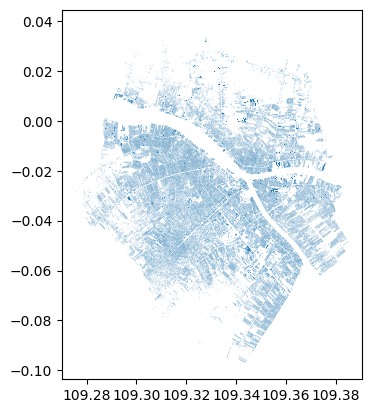

In [28]:
building_geofabrik.plot()
plt.show()

# **Menambahkan wilayah administrasi**

# **Data USK**

## Tambah kota

In [29]:
building_usk = building_usk.drop(columns=["Kecamatan"])
building_usk = building_usk[building_usk["geometry"].notna()].copy()
building_usk.loc[:, "Kota"] = "Kota Pontianak"

## Tambah Kecamatan

In [30]:
joined = gpd.sjoin(
    building_usk,
    kec[["geo", "official_name"]],
    how="left",
    predicate="intersects"
)

joined = joined.rename(columns={"official_name": "Kecamatan"})
joined = joined.drop(columns=["index_right"])
building_usk = joined.copy()

## Tambah Desa

In [31]:
joined = gpd.sjoin(
    building_usk,
    desa[["geo", "name"]],
    how="left",
    predicate="intersects"
)

joined = joined.rename(columns={"name_right": "Desa"})
joined = joined.drop(columns=["index_right"])
building_usk = joined.copy()

In [32]:
building_usk

,osm_id,osm_type,addr_stree,building,military,office,government,landuse,name_left,access_roo,...,isced_leve,addr_house,capacity,roof_mater,amenity,emergency,geometry,Kota,Kecamatan,Desa
0,574155598.0,ways_poly,None,yes,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.28768 7.4e-5 0, 109.28778 5.54...",Kota Pontianak,Kecamatan Pontianak Barat,Sungai Beliung
1,574155627.0,ways_poly,None,yes,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.28727 1.56615e-5 0, 109.28726 ...",Kota Pontianak,Kecamatan Pontianak Barat,Sungai Beliung
2,574155454.0,ways_poly,None,yes,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.2868 0.00017 0, 109.28678 1.71...",Kota Pontianak,Kecamatan Pontianak Barat,Sungai Beliung
3,574155596.0,ways_poly,None,yes,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.28779 0.00011 0, 109.28779 7.0...",Kota Pontianak,Kecamatan Pontianak Barat,Sungai Beliung
4,573354340.0,ways_poly,None,yes,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.36338 -0.04253 0, 109.36329 -0...",Kota Pontianak,Kecamatan Pontianak Timur,Banjar Serasan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182359,0.0,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.3447 -0.01076 0, 109.34475 -0....",Kota Pontianak,Kecamatan Pontianak Utara,Siantan Tengah
182360,0.0,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.34112 -0.00797 0, 109.34122 -0...",Kota Pontianak,Kecamatan Pontianak Utara,Siantan Hilir
182361,0.0,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.34109 -0.00829 0, 109.34124 -0...",Kota Pontianak,Kecamatan Pontianak Utara,Siantan Hilir
182362,0.0,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,"POLYGON Z ((109.34427 -0.00855 0, 109.34432 -0...",Kota Pontianak,Kecamatan Pontianak Utara,Siantan Tengah


# **Data geofabrik (osm based)**

## Tambah kota

In [33]:
building_geofabrik = building_geofabrik[building_geofabrik["geometry"].notna()].copy()
building_geofabrik.loc[:, "Kota"] = "Kota Pontianak"

## Tambah Kecamatan

In [34]:
joined = gpd.sjoin(
    building_geofabrik,
    kec[["geo", "official_name"]],
    how="left",
    predicate="intersects"
)

joined = joined.rename(columns={"official_name": "Kecamatan"})
joined = joined.drop(columns=["index_right"])
building_geofabrik = joined.copy()

In [35]:
building_geofabrik.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 150949 entries, 0 to 150946
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   osm_id     150949 non-null  object  
 1   code       150949 non-null  int32   
 2   fclass     150949 non-null  object  
 3   name       1085 non-null    object  
 4   type       1603 non-null    object  
 5   geometry   150949 non-null  geometry
 6   Kota       150949 non-null  object  
 7   Kecamatan  150949 non-null  object  
dtypes: geometry(1), int32(1), object(6)
memory usage: 9.8+ MB


## Tambah Desa

In [36]:
joined = gpd.sjoin(
    building_geofabrik,
    desa[["geo", "name"]],
    how="left",
    predicate="intersects"
)

joined = joined.rename(columns={"name_right": "Desa"})
joined = joined.drop(columns=["index_right"])
building_geofabrik = joined.copy()

In [37]:
building_geofabrik.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 151344 entries, 0 to 150946
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   osm_id     151344 non-null  object  
 1   code       151344 non-null  int32   
 2   fclass     151344 non-null  object  
 3   name_left  1086 non-null    object  
 4   type       1603 non-null    object  
 5   geometry   151344 non-null  geometry
 6   Kota       151344 non-null  object  
 7   Kecamatan  151344 non-null  object  
 8   Desa       151344 non-null  object  
dtypes: geometry(1), int32(1), object(7)
memory usage: 11.0+ MB


In [38]:
building_geofabrik

,osm_id,code,fclass,name_left,type,geometry,Kota,Kecamatan,Desa
0,123177072,1500,building,Ayani Mega Mall,commercial,"POLYGON ((109.34421 -0.05176, 109.34431 -0.051...",Kota Pontianak,Kecamatan Pontianak Selatan,Parit Tokaya
1,155153671,1500,building,Gayatri,None,"POLYGON ((109.35566 -0.06503, 109.35574 -0.064...",Kota Pontianak,Kecamatan Pontianak Tenggara,Bangka Belitung Darat
2,174086491,1500,building,None,None,"POLYGON ((109.32721 -0.01825, 109.32742 -0.018...",Kota Pontianak,Kecamatan Pontianak Barat,Sungai Jawi Dalam
3,174086493,1500,building,Rumah Duka St. Michael,None,"POLYGON ((109.32757 -0.01917, 109.32788 -0.019...",Kota Pontianak,Kecamatan Pontianak Kota,Mariana
4,174086496,1500,building,None,None,"POLYGON ((109.32765 -0.01977, 109.32765 -0.019...",Kota Pontianak,Kecamatan Pontianak Kota,Mariana
...,...,...,...,...,...,...,...,...,...
150942,1457486452,1500,building,None,None,"POLYGON ((109.34341 -0.06879, 109.34355 -0.068...",Kota Pontianak,Kecamatan Pontianak Tenggara,Bansir Darat
150943,1457486453,1500,building,None,None,"POLYGON ((109.34406 -0.06933, 109.3441 -0.0693...",Kota Pontianak,Kecamatan Pontianak Tenggara,Bansir Darat
150944,1457486454,1500,building,None,None,"POLYGON ((109.34393 -0.06941, 109.34405 -0.069...",Kota Pontianak,Kecamatan Pontianak Tenggara,Bansir Darat
150945,1457491875,1500,building,None,None,"POLYGON ((109.3338 -0.0238, 109.33382 -0.02375...",Kota Pontianak,Kecamatan Pontianak Kota,Tengah


In [39]:
# building_usk.to_file("building_usk_AdministrativeFull.shp")

In [40]:
# building_geofabrik.to_file("building_geofabrik_AdministrativeFull.shp")

#**Compile Data OSM**

In [41]:
url = "https://github.com/alzimna/ara/raw/refs/heads/main/Building_OSM/map.osm"
building_osm = gpd.read_file(url,layer = "multipolygons")

In [42]:
for i in range(1,40) :
  url = f'https://github.com/alzimna/ara/raw/refs/heads/main/Building_OSM/map%20({i}).osm'
  temp = gpd.read_file(url,layer = "multipolygons")
  building_osm = pd.concat([building_osm, temp])

In [43]:
building_osm

,osm_id,osm_way_id,name,type,aeroway,amenity,admin_level,barrier,boundary,building,...,man_made,military,natural,office,place,shop,sport,tourism,other_tags,geometry
0,None,304181959,Terminal Batulayang,None,None,bus_station,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.29283 0.01336, 109.29362 0..."
1,None,412022894,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.26618 0.01892, 109.26628 0..."
2,None,412028054,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.26694 0.01972, 109.26685 0..."
3,None,412028055,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.26675 0.01933, 109.26711 0..."
4,None,412028056,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.26921 0.0181, 109.26942 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4840,None,890854571,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.23691 -0.03055, 109.23687 ..."
4841,None,911363126,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.24764 -0.06412, 109.24782 ..."
4842,None,1075217656,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.23638 -0.05666, 109.23638 ..."
4843,None,1075217657,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.23579 -0.05665, 109.23541 ..."


In [44]:
luar = ponti.iloc[0]["geo"]

mask = building_osm.geometry.intersects(luar)
building_osm = building_osm[mask].copy()
building_osm

,osm_id,osm_way_id,name,type,aeroway,amenity,admin_level,barrier,boundary,building,...,man_made,military,natural,office,place,shop,sport,tourism,other_tags,geometry
0,None,304181959,Terminal Batulayang,None,None,bus_station,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.29283 0.01336, 109.29362 0..."
22,None,522379685,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.29878 0.00905, 109.29883 0..."
23,None,522379686,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.29877 0.00892, 109.29912 0..."
24,None,522379687,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.29825 0.00899, 109.29833 0..."
25,None,522379870,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.29727 0.00879, 109.29724 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7878,None,1133352711,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.30543 -0.05962, 109.30552 ..."
7879,None,1133352712,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.30577 -0.05974, 109.30583 ..."
7880,None,1133352713,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.3055 -0.05979, 109.30566 -..."
7881,None,1133352732,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((109.30646 -0.05961, 109.30653 ..."


## Tambah kota

In [45]:
building_osm = building_osm[building_osm["geometry"].notna()].copy()
building_osm.loc[:, "Kota"] = "Kota Pontianak"

## Tambah Kecamatan

In [46]:
joined = gpd.sjoin(
    building_osm,
    kec[["geo", "official_name"]],
    how="left",
    predicate="intersects"
)

joined = joined.rename(columns={"official_name": "Kecamatan"})
joined = joined.drop(columns=["index_right"])
building_osm = joined.copy()

## Tambah Desa

In [47]:
joined = gpd.sjoin(
    building_osm,
    desa[["geo", "name"]],
    how="left",
    predicate="intersects"
)

joined = joined.rename(columns={"name_right": "Desa"})
joined = joined.drop(columns=["index_right"])
building_osm = joined.copy()

In [48]:
building_osm.loc[:,"lat"] = building_osm.geometry.centroid.y
building_osm.loc[:,"lon"] = building_osm.geometry.centroid.x
building_osm.loc[:,"gmaps"] = building_osm["lat"].astype(str) + "," + building_osm["lon"].astype(str)
building_osm = building_osm.drop(columns=["lat","lon"])

building_osm = building_osm[building_osm["boundary"].isna()].copy()

building_osm

,osm_id,osm_way_id,name_left,type,aeroway,amenity,admin_level,barrier,boundary,building,...,place,shop,sport,tourism,other_tags,geometry,Kota,Kecamatan,Desa,gmaps
0,None,304181959,Terminal Batulayang,None,None,bus_station,None,None,None,None,...,None,None,None,None,None,"MULTIPOLYGON (((109.29283 0.01336, 109.29362 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.012294525036680203,109.29295637422888"
22,None,522379685,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.29878 0.00905, 109.29883 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.009034650000000002,109.29889819999998"
23,None,522379686,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.29877 0.00892, 109.29912 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.008740998840660402,109.29890238420168"
24,None,522379687,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.29825 0.00899, 109.29833 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.008960233003002303,109.29850111920736"
25,None,522379870,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.29727 0.00879, 109.29724 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.008772981467637646,109.29723094613973"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7878,None,1133352711,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.30543 -0.05962, 109.30552 ...",Kota Pontianak,Kecamatan Pontianak Kota,Sungai Bangkong,"-0.059742684309680896,109.30542280980495"
7879,None,1133352712,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.30577 -0.05974, 109.30583 ...",Kota Pontianak,Kecamatan Pontianak Kota,Sungai Bangkong,"-0.059843411687336624,109.30573045906135"
7880,None,1133352713,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.3055 -0.05979, 109.30566 -...",Kota Pontianak,Kecamatan Pontianak Kota,Sungai Bangkong,"-0.05989979999999927,109.305544"
7881,None,1133352732,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.30646 -0.05961, 109.30653 ...",Kota Pontianak,Kecamatan Pontianak Kota,Sungai Bangkong,"-0.05968553547192793,109.30645411554305"


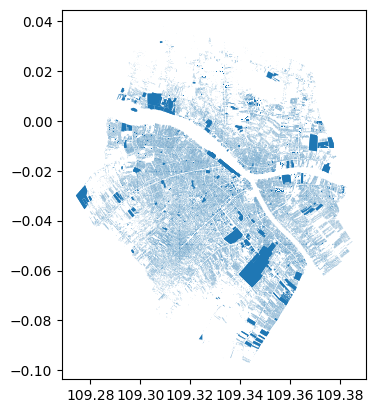

In [49]:
building_osm.plot()
plt.show()

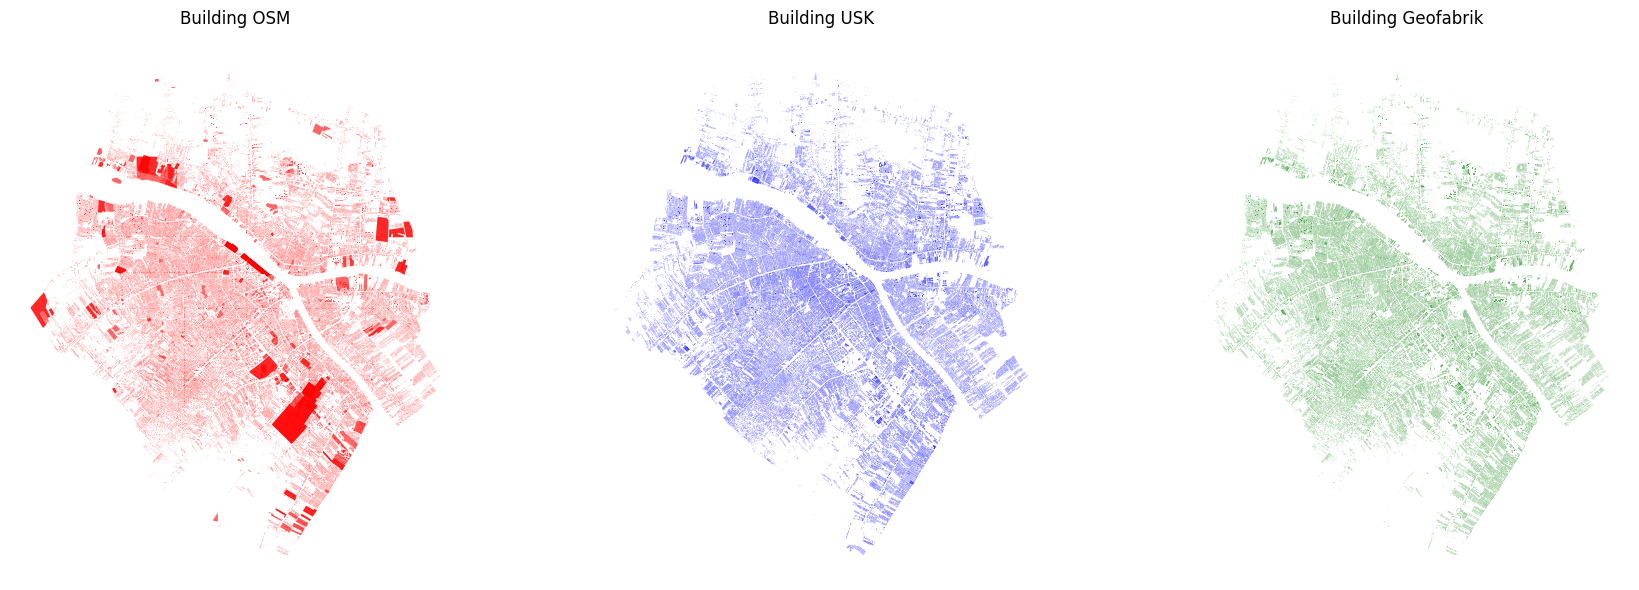

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

building_osm.plot(ax=axes[0], color="red", alpha=0.6)
axes[0].set_title("Building OSM")

building_usk.plot(ax=axes[1], color="blue", alpha=0.6)
axes[1].set_title("Building USK")

building_geofabrik.plot(ax=axes[2], color="green", alpha=0.6)
axes[2].set_title("Building Geofabrik")

for ax in axes:
    ax.set_axis_off()

plt.tight_layout()
plt.show()

## Data Raw untuk Survey
Kita coba pakai data hasil OSM

In [51]:
# data_raw = building_osm.copy()

# sheets_kecamatan = defaultdict()
# list_kecamatan = data_raw.Kecamatan.unique()

# for item in list_kecamatan :
#   sheets_kecamatan[item] = data_raw[data_raw.Kecamatan == item]

# sheets_desa = defaultdict()
# list_desa = data_raw.Desa.unique()

# for item in list_desa :
#   sheets_desa[item] = data_raw[data_raw.Desa == item]

# with pd.ExcelWriter("data_raw.xlsx", engine="xlsxwriter") as writer:
#     data_raw.assign(geometry=data_raw.geometry.to_wkt()) \
#         .to_excel(writer, sheet_name="main", index=False)

#     for item in list_kecamatan :
#       sheets_kecamatan[item].assign(geometry=sheets_kecamatan[item].geometry.to_wkt()) \
#         .to_excel(writer, sheet_name=item, index=False)

#     for item in list_desa :
#       sheets_desa[item].assign(geometry=sheets_desa[item].geometry.to_wkt()) \
#         .to_excel(writer, sheet_name=item, index=False)

In [52]:
data_raw = building_osm.copy()
data_raw

,osm_id,osm_way_id,name_left,type,aeroway,amenity,admin_level,barrier,boundary,building,...,place,shop,sport,tourism,other_tags,geometry,Kota,Kecamatan,Desa,gmaps
0,None,304181959,Terminal Batulayang,None,None,bus_station,None,None,None,None,...,None,None,None,None,None,"MULTIPOLYGON (((109.29283 0.01336, 109.29362 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.012294525036680203,109.29295637422888"
22,None,522379685,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.29878 0.00905, 109.29883 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.009034650000000002,109.29889819999998"
23,None,522379686,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.29877 0.00892, 109.29912 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.008740998840660402,109.29890238420168"
24,None,522379687,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.29825 0.00899, 109.29833 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.008960233003002303,109.29850111920736"
25,None,522379870,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.29727 0.00879, 109.29724 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.008772981467637646,109.29723094613973"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7878,None,1133352711,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.30543 -0.05962, 109.30552 ...",Kota Pontianak,Kecamatan Pontianak Kota,Sungai Bangkong,"-0.059742684309680896,109.30542280980495"
7879,None,1133352712,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.30577 -0.05974, 109.30583 ...",Kota Pontianak,Kecamatan Pontianak Kota,Sungai Bangkong,"-0.059843411687336624,109.30573045906135"
7880,None,1133352713,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.3055 -0.05979, 109.30566 -...",Kota Pontianak,Kecamatan Pontianak Kota,Sungai Bangkong,"-0.05989979999999927,109.305544"
7881,None,1133352732,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.30646 -0.05961, 109.30653 ...",Kota Pontianak,Kecamatan Pontianak Kota,Sungai Bangkong,"-0.05968553547192793,109.30645411554305"


## Pivot table per kecamatan

In [53]:
pivot_kec = pd.pivot_table(
    data_raw,
    index="Kecamatan",
    columns="building",
    aggfunc="size",
    fill_value=0
)

pivot_kec["Grand Total"] = pivot_kec.sum(axis=1)


pivot_kec.loc["Grand Total"] = pivot_kec.sum(axis=0)

In [54]:
from IPython.display import display, HTML

html = "<div style='display:grid; grid-template-columns: repeat(5, 1fr); gap:12px;'>"

for item in data_raw.Kecamatan.unique():
    temp = pivot_kec.loc[item]
    temp = temp[temp != 0].copy()

    html += "<div style='border:1px solid #ccc; padding:8px;'>"
    html += f"<b>{item}</b>"
    html += temp.to_frame("Count").to_html()
    html += "</div>"

html += "</div>"

display(HTML(html))

,Count
building,
commercial,2
construction,2
garage,2
house,9
industrial,9
mosque,3
residential,359
roof,1
school,3


## Pivot table per desa

In [55]:
pivot_desa = pd.pivot_table(
    data_raw,
    index="Desa",
    columns="building",
    aggfunc="size",
    fill_value=0
)

pivot_desa["Grand Total"] = pivot_desa.sum(axis=1)


pivot_desa.loc["Grand Total"] = pivot_desa.sum(axis=0)

In [56]:
from IPython.display import display, HTML

html = "<div style='display:grid; grid-template-columns: repeat(5, 1fr); gap:12px;'>"

for item in data_raw.Desa.unique():
    temp = pivot_desa.loc[item]
    temp = temp[temp != 0].copy()

    html += "<div style='border:1px solid #ccc; padding:8px;'>"
    html += f"<b>{item}</b>"
    html += temp.to_frame("Count").to_html()
    html += "</div>"

html += "</div>"

display(HTML(html))


,Count
building,
garage,2
industrial,7
residential,103
warehouse,1
yes,5610
Grand Total,5723
,Count
building,
industrial,2


Karena banyak bangunan yang tidak teridentifikasi kegunaannya, mungkin sebaiknya sample frame dibatasi hanya daerah yang beresiko tinggi terkena banjir. Ada 2 definisi daerah beresiko tinggi yang bisa dipakai.



1. Setiap desa yang berjarak tertentu dengan sungai dikatakan beresiko tinggi
2. Setiap bangunan yang berjarak tertentu dengan sungai dikatakan beresiko tinggi
3. Menggunakan hasil simulasi dari USK



## Alternatif 1

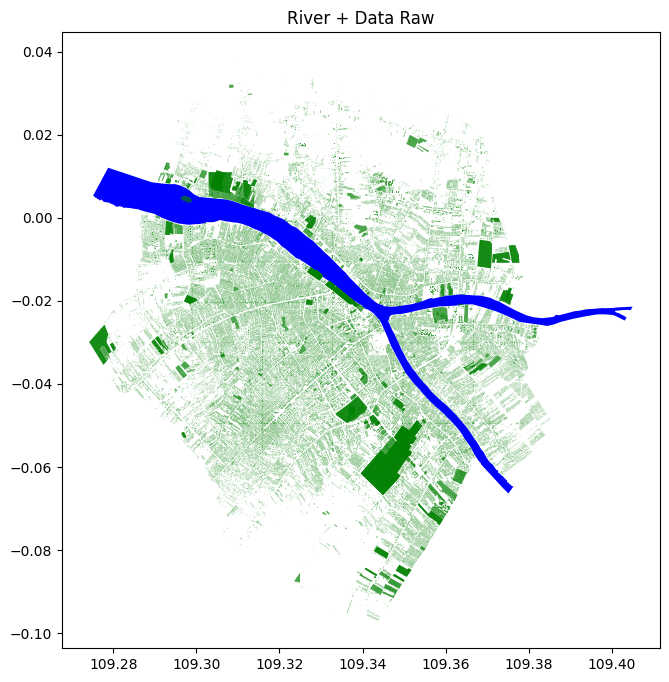

In [57]:
fig, ax = plt.subplots(figsize=(8,8))

river.plot(ax=ax, color="blue", linewidth=1)
data_raw.plot(ax=ax, color="green", markersize=5, alpha=0.7)

plt.title("River + Data Raw")
plt.show()

In [58]:
luar = river.iloc[0]["geometry"]
mask = desa.intersects(luar)
high_risk_1 = desa[mask].copy()
high_risk_1["name"]

,name
1958,Parit Mayor
1959,Tambelan Sampit
1960,Darat Sekip
1961,Dalam Bugis
1962,Benua Melayu Laut
1963,Tanjung Hilir
1964,Tanjung Hulu
1965,Siantan Tengah
1966,Siantan Hulu
1969,Sungai Beliung


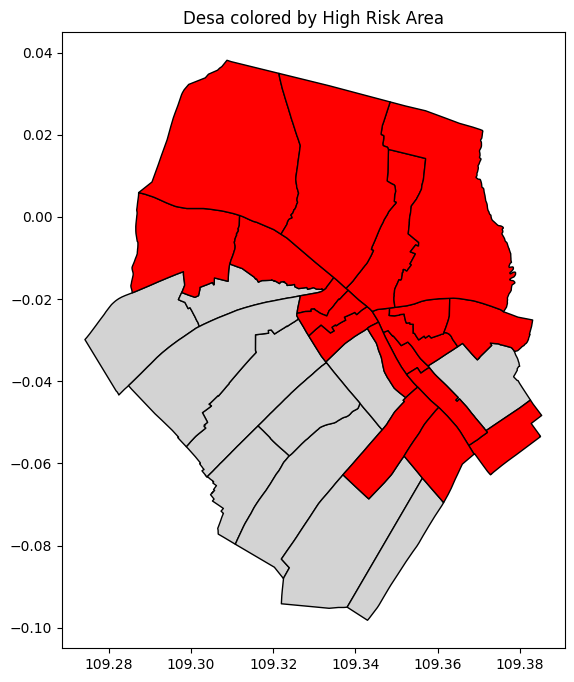

In [59]:
fig, ax = plt.subplots(figsize=(8,8))

desa["risk"] = desa["name"].isin(high_risk_1["name"])

# Plot non-risk first
desa[~desa["risk"]].plot(ax=ax, color="lightgray", edgecolor="black")

# Plot high-risk on top
desa[desa["risk"]].plot(ax=ax, color="red", edgecolor="black")

plt.title("Desa colored by High Risk Area")
plt.show()

In [60]:
data_raw_high_risk = data_raw[data_raw["Desa"].isin(high_risk_1["name"])]
data_raw_high_risk

,osm_id,osm_way_id,name_left,type,aeroway,amenity,admin_level,barrier,boundary,building,...,place,shop,sport,tourism,other_tags,geometry,Kota,Kecamatan,Desa,gmaps
0,None,304181959,Terminal Batulayang,None,None,bus_station,None,None,None,None,...,None,None,None,None,None,"MULTIPOLYGON (((109.29283 0.01336, 109.29362 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.012294525036680203,109.29295637422888"
22,None,522379685,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.29878 0.00905, 109.29883 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.009034650000000002,109.29889819999998"
23,None,522379686,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.29877 0.00892, 109.29912 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.008740998840660402,109.29890238420168"
24,None,522379687,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.29825 0.00899, 109.29833 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.008960233003002303,109.29850111920736"
25,None,522379870,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.29727 0.00879, 109.29724 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.008772981467637646,109.29723094613973"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,None,574646287,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.38347 -0.05229, 109.38343 ...",Kota Pontianak,Kecamatan Pontianak Timur,Parit Mayor,"-0.05224829683809387,109.38347476667404"
2800,None,740085151,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.38391 -0.05227, 109.38396 ...",Kota Pontianak,Kecamatan Pontianak Timur,Parit Mayor,"-0.05228843314161384,109.38396054930342"
2801,None,740085152,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.38381 -0.05214, 109.38386 ...",Kota Pontianak,Kecamatan Pontianak Timur,Parit Mayor,"-0.05214590039516785,109.38385313328166"
2802,None,740085153,None,None,None,None,None,None,None,yes,...,None,None,None,None,None,"MULTIPOLYGON (((109.38371 -0.05203, 109.38377 ...",Kota Pontianak,Kecamatan Pontianak Timur,Parit Mayor,"-0.05203071815288964,109.38376308551724"


In [61]:
html = "<div style='display:grid; grid-template-columns: repeat(5, 1fr); gap:12px;'>"

for item in high_risk_1.name.unique():
    temp = pivot_desa.loc[item]
    temp = temp[temp != 0].copy()

    html += "<div style='border:1px solid #ccc; padding:8px;'>"
    html += f"<b>{item}</b>"
    html += temp.to_frame("Count").to_html()
    html += "</div>"

html += "</div>"

display(HTML(html))


,Count
building,
civic,1
commercial,1
house,4
kindergarten,1
mosque,1
residential,2
school,2
warehouse,1
yes,3383


## Alternatif 2
Setiap bangunan yang berjarak tertentu dengan sungai dikatakan beresiko tinggi

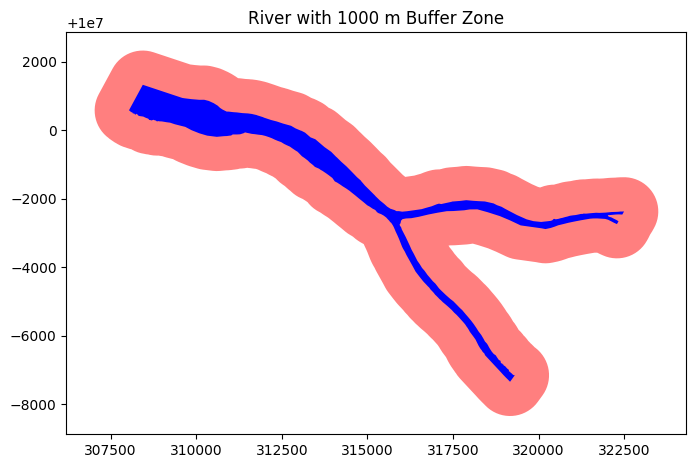

In [106]:
river = river.set_crs(epsg=4326, inplace=False)
river_m = river.to_crs(32749)     # meters
buffer_m = river_m.buffer(1000)

fig, ax = plt.subplots(figsize=(8,8))

buffer_m.plot(ax=ax, color="red", alpha=0.5, edgecolor="none")

river_m.plot(ax=ax, color="blue", linewidth=2)

plt.title("River with 1000 m Buffer Zone")
plt.show()

In [113]:
buffer_deg = gpd.GeoDataFrame(geometry=buffer_m, crs=river_m.crs).to_crs(4326)
luar = buffer_deg.iloc[0]["geometry"]

mask = data_raw.intersects(luar)
high_risk_2 = data_raw[mask].copy()
high_risk_2

,osm_id,osm_way_id,name_left,type,aeroway,amenity,admin_level,barrier,boundary,building,...,shop,sport,tourism,other_tags,geometry,Kota,Kecamatan,Desa,gmaps,risk
0,None,304181959,Terminal Batulayang,None,None,bus_station,None,None,None,None,...,None,None,None,None,"MULTIPOLYGON (((109.29283 0.01336, 109.29362 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.012294525036680203,109.29295637422888",True
22,None,522379685,None,None,None,None,None,None,None,yes,...,None,None,None,None,"MULTIPOLYGON (((109.29878 0.00905, 109.29883 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.009034650000000002,109.29889819999998",True
23,None,522379686,None,None,None,None,None,None,None,yes,...,None,None,None,None,"MULTIPOLYGON (((109.29877 0.00892, 109.29912 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.008740998840660402,109.29890238420168",True
24,None,522379687,None,None,None,None,None,None,None,yes,...,None,None,None,None,"MULTIPOLYGON (((109.29825 0.00899, 109.29833 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.008960233003002303,109.29850111920736",True
25,None,522379870,None,None,None,None,None,None,None,yes,...,None,None,None,None,"MULTIPOLYGON (((109.29727 0.00879, 109.29724 0...",Kota Pontianak,Kecamatan Pontianak Utara,Batu Layang,"0.008772981467637646,109.29723094613973",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4665,None,874888508,None,None,None,None,None,None,None,yes,...,None,None,None,None,"MULTIPOLYGON (((109.37381 -0.06105, 109.37384 ...",Kota Pontianak,Kecamatan Pontianak Timur,Parit Mayor,"-0.0610485240745693,109.37384437260759",True
4666,None,878046932,None,None,None,None,None,None,None,None,...,None,None,None,None,"MULTIPOLYGON (((109.37398 -0.05782, 109.37392 ...",Kota Pontianak,Kecamatan Pontianak Timur,Parit Mayor,"-0.057896449999999995,109.37398565",True
4667,None,878046933,None,None,None,None,None,None,None,None,...,None,None,None,None,"MULTIPOLYGON (((109.37376 -0.05794, 109.3738 -...",Kota Pontianak,Kecamatan Pontianak Timur,Parit Mayor,"-0.0579337,109.3738271",True
4668,None,878046935,None,None,None,None,None,None,None,None,...,None,None,None,None,"MULTIPOLYGON (((109.37385 -0.0581, 109.37395 -...",Kota Pontianak,Kecamatan Pontianak Timur,Parit Mayor,"-0.05809294999999984,109.37391754999999",True


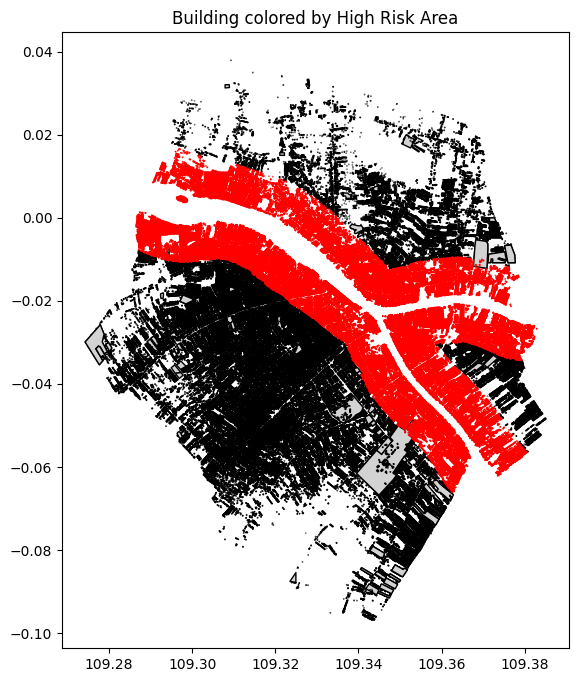

In [131]:
fig, ax = plt.subplots(figsize=(8,8))

data_raw["risk"] = mask

# Plot non-risk first
data_raw[~data_raw["risk"]].plot(ax=ax, color="lightgray", edgecolor="black")

# Plot high-risk on top
data_raw[data_raw["risk"]].plot(ax=ax, color="red", edgecolor="red")

plt.title("Building colored by High Risk Area")
plt.show()